In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os
import json
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
from matplotlib import cm
import corner

from agnfinder.tf_sampling import run_sampler

In [4]:
tf.enable_eager_execution()

In [5]:
os.chdir('/home/mike/repos/agnfinder')

In [6]:
params = ['mass', 'dust2', 'tage', 'tau', 'agn_disk_scaling', 'agn_eb_v', 'agn_torus_scaling']

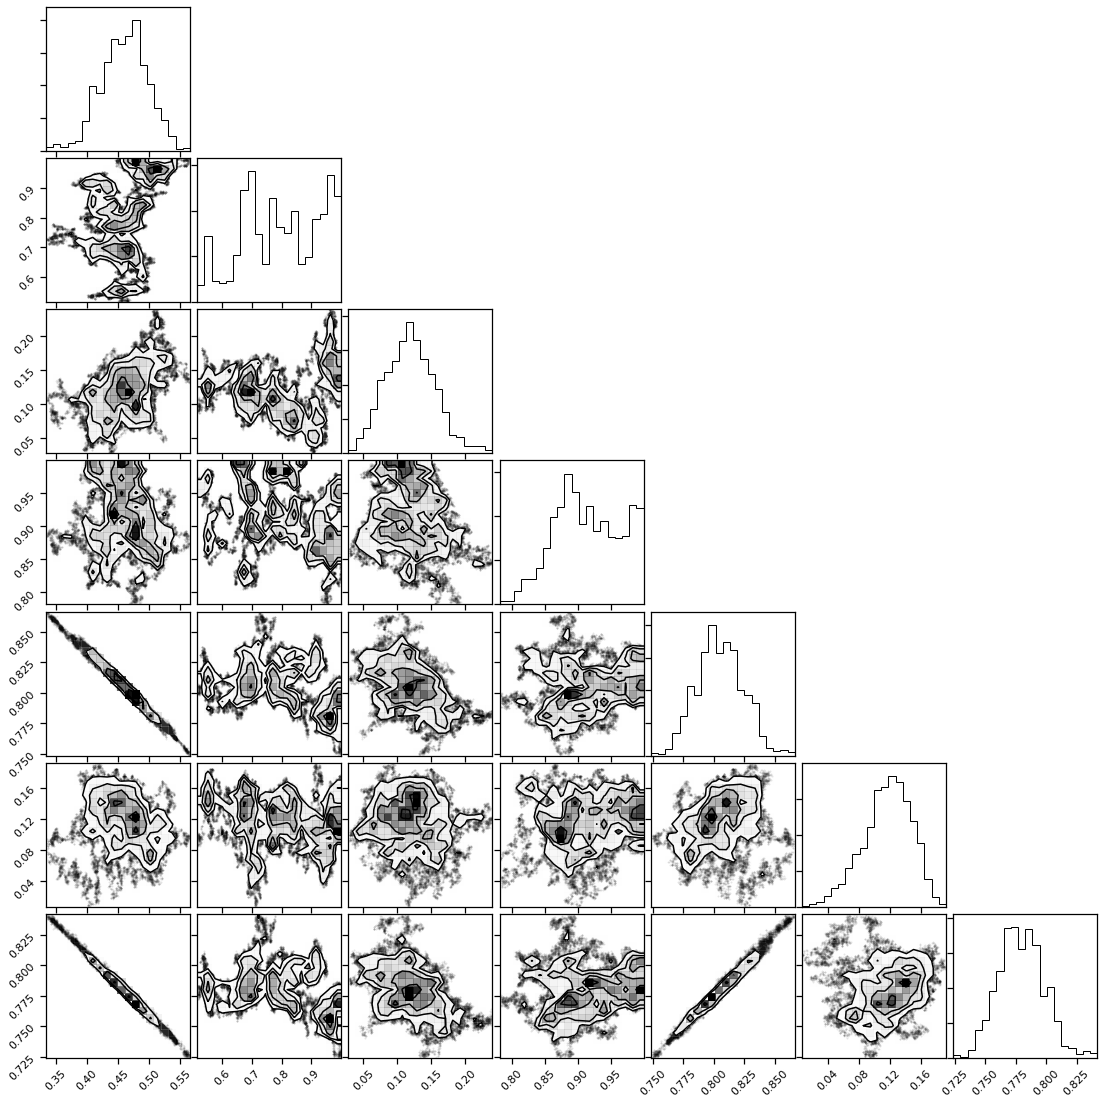

In [6]:
# using L, leapfrog steps, of either 1 or 3 I think
galaxies = run_sampler.read_performance('results/emulated_sampling/latest_60000_1_roughly_correct')
_ = corner.corner(galaxies[0].reshape(-1, 7))

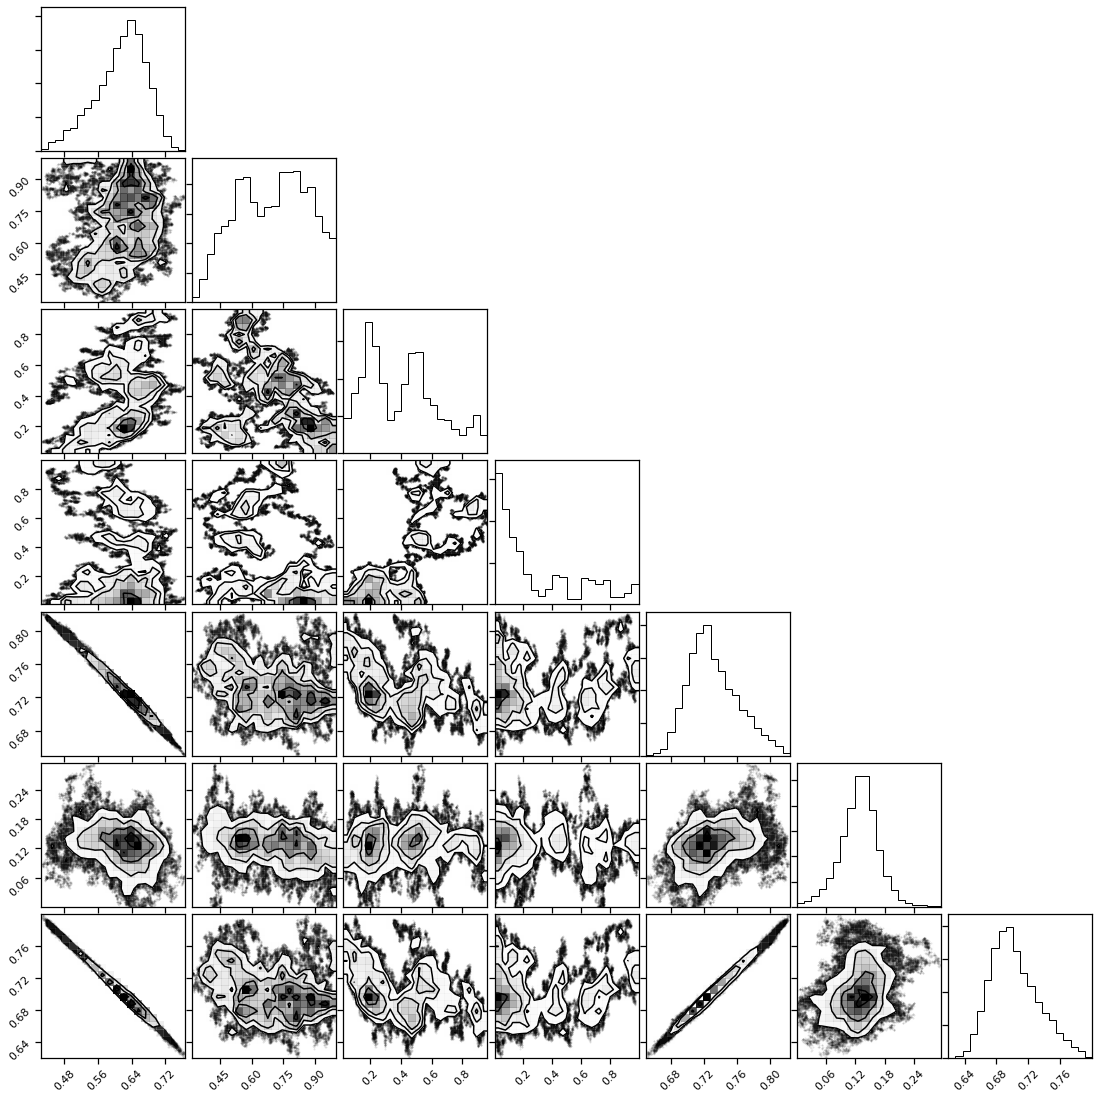

In [7]:
# using L of 5 and running for 150k steps instead of 60k
galaxies = run_sampler.read_performance('results/emulated_sampling/latest_150005_1_roughly_correct')
_ = corner.corner(galaxies[0].reshape(-1, 7))

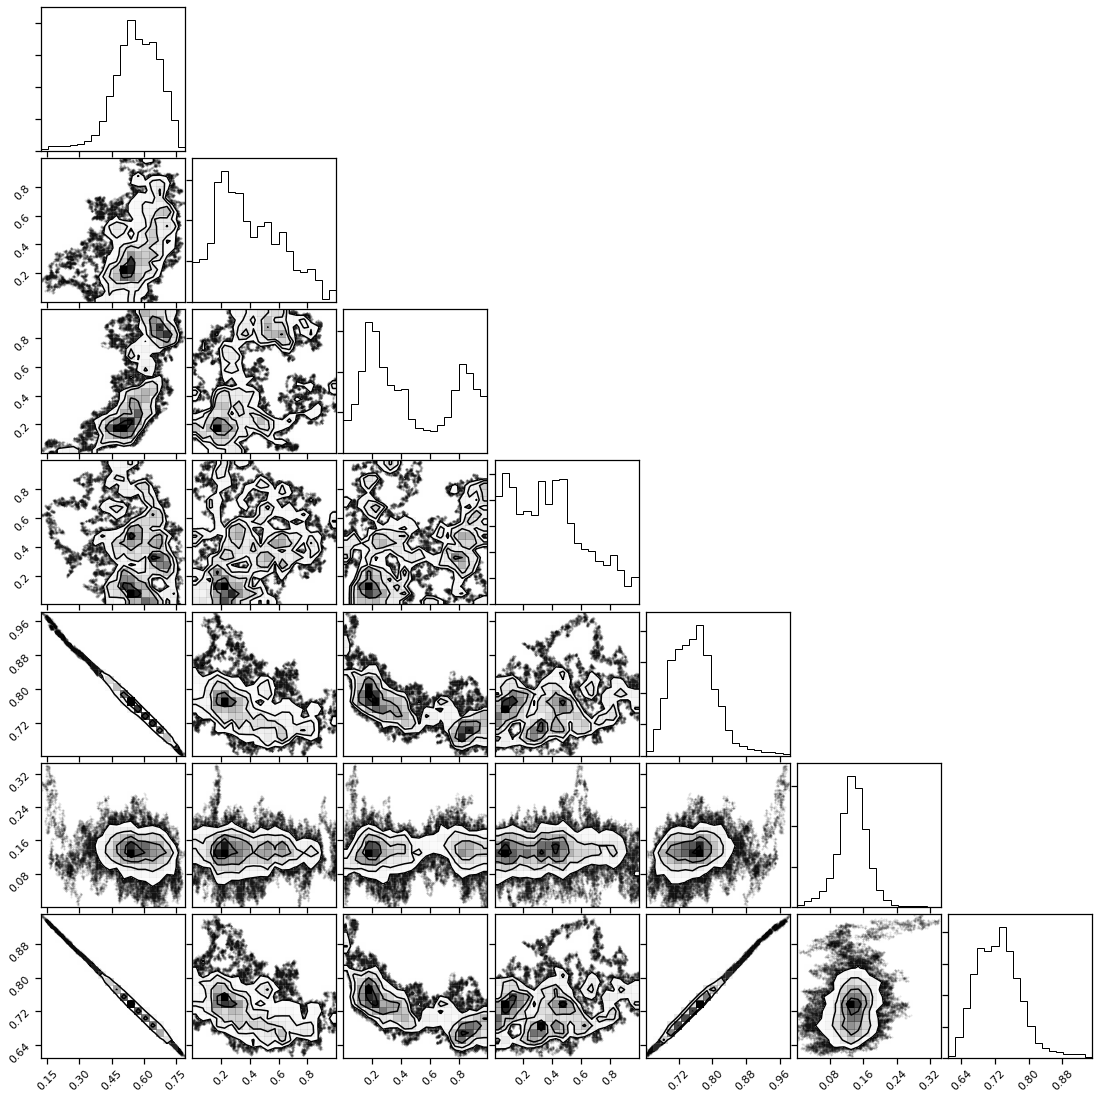

In [8]:
# using L of 10
galaxies = run_sampler.read_performance('results/emulated_sampling/latest_150010_1_roughly_correct')
_ = corner.corner(galaxies[0].reshape(-1, 7))

Increasing L from 5 to 10 gave much better spreading. More leapfrog steps mean each sample is further apart, for fixed step size. This has some computational cost. Leapfrog is symplectic so making many small steps preserves energy and acceptance ratio. If the step size was too large, dual adaption would force it to be smaller.

Haven't tested above 10, but it could help. Should do!

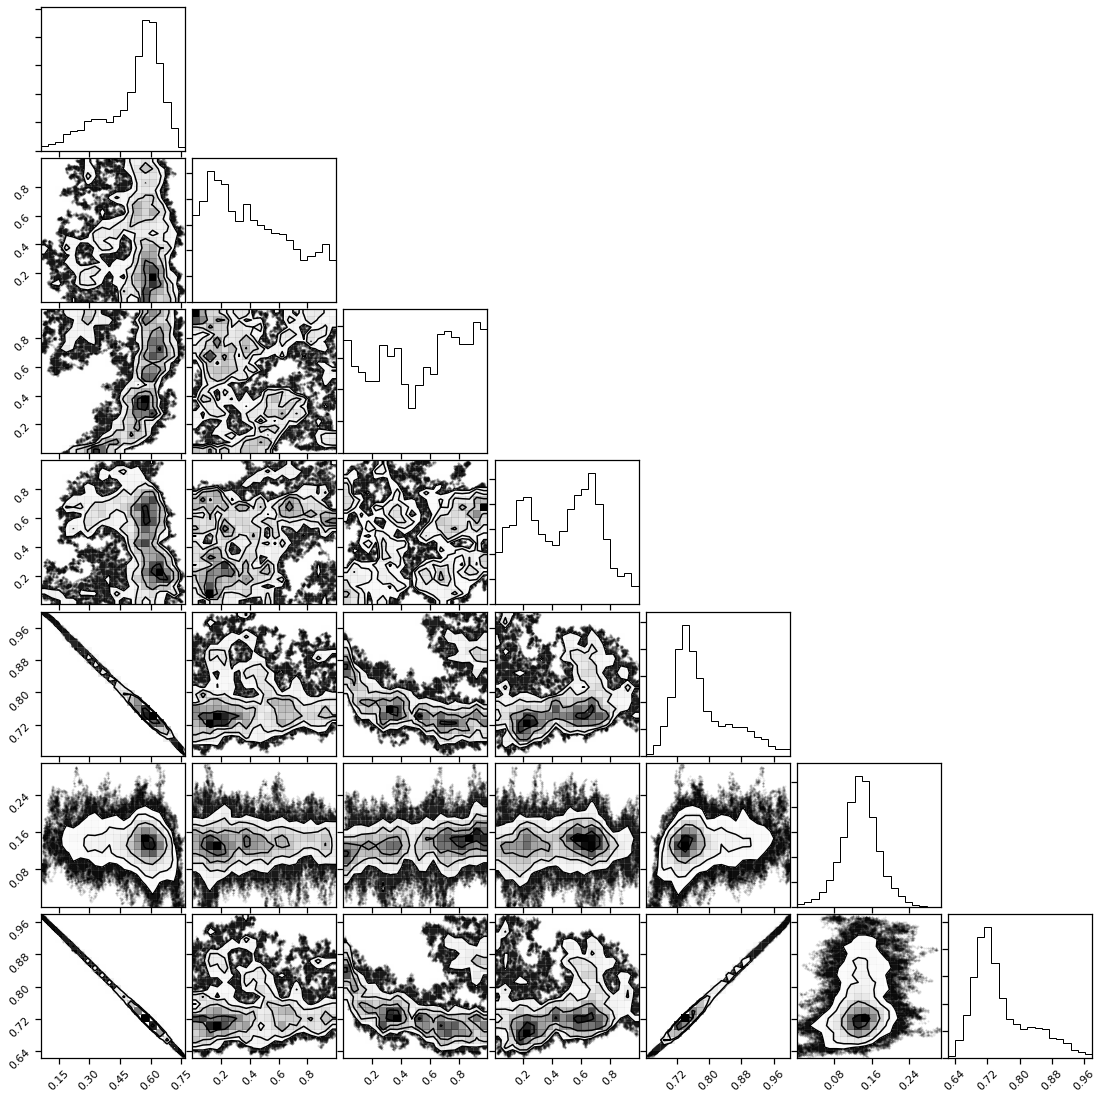

In [9]:
# keeping L of 10 and adding a second chain
galaxies = run_sampler.read_performance('results/emulated_sampling/latest_150010_2_roughly_correct')
_ = corner.corner(galaxies[0].reshape(-1, 7))

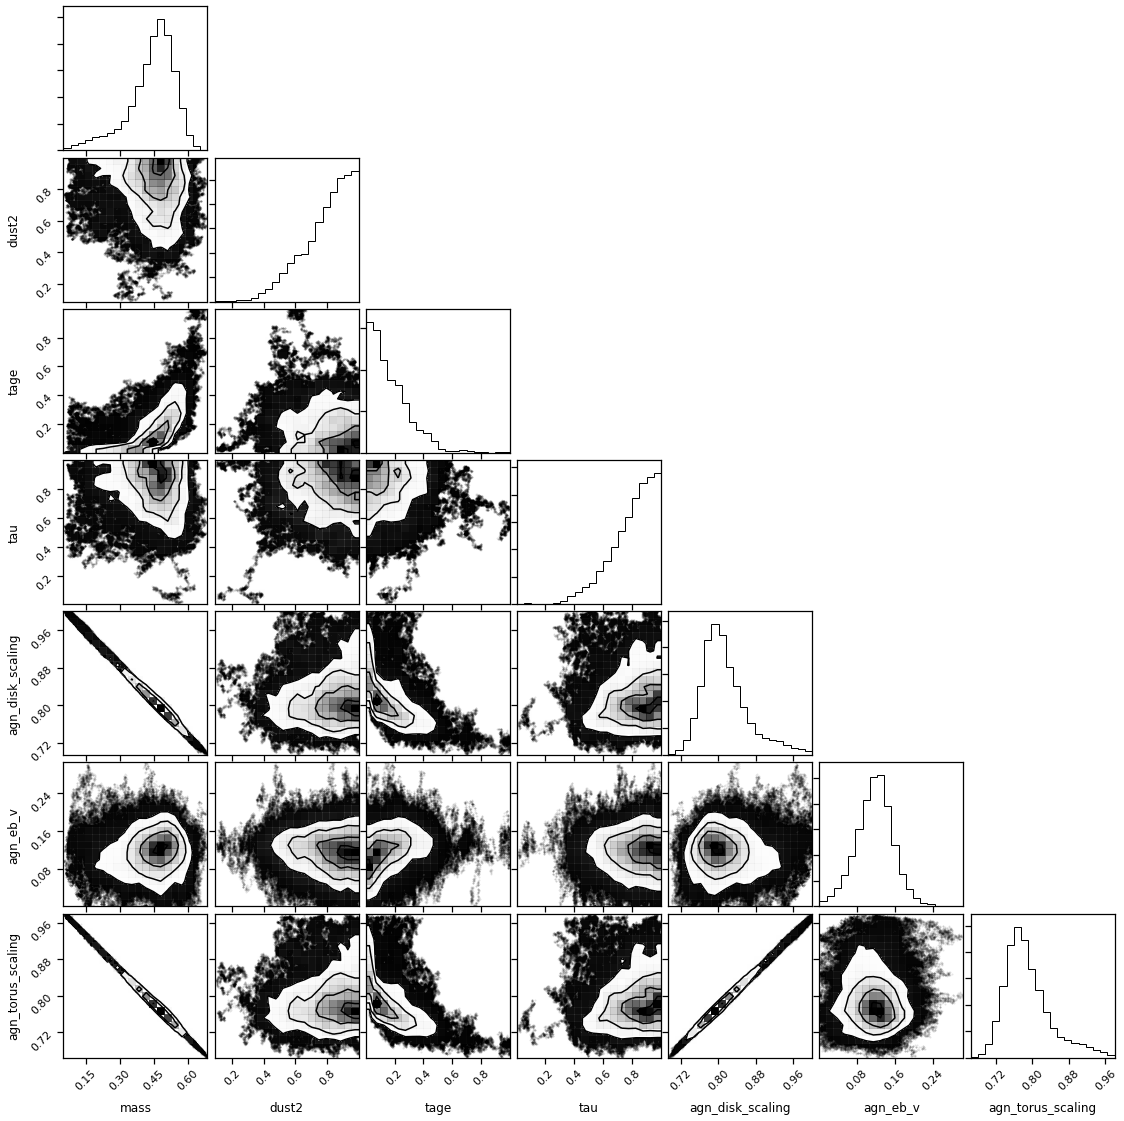

In [10]:
# now down to 8k steps, but with 96 chains (keeping L of 10).

# starting from roughly correct
galaxies = run_sampler.read_performance('results/emulated_sampling/latest_8000_96_roughly_correct')
_ = corner.corner(galaxies[0].reshape(-1, 7), labels=params)

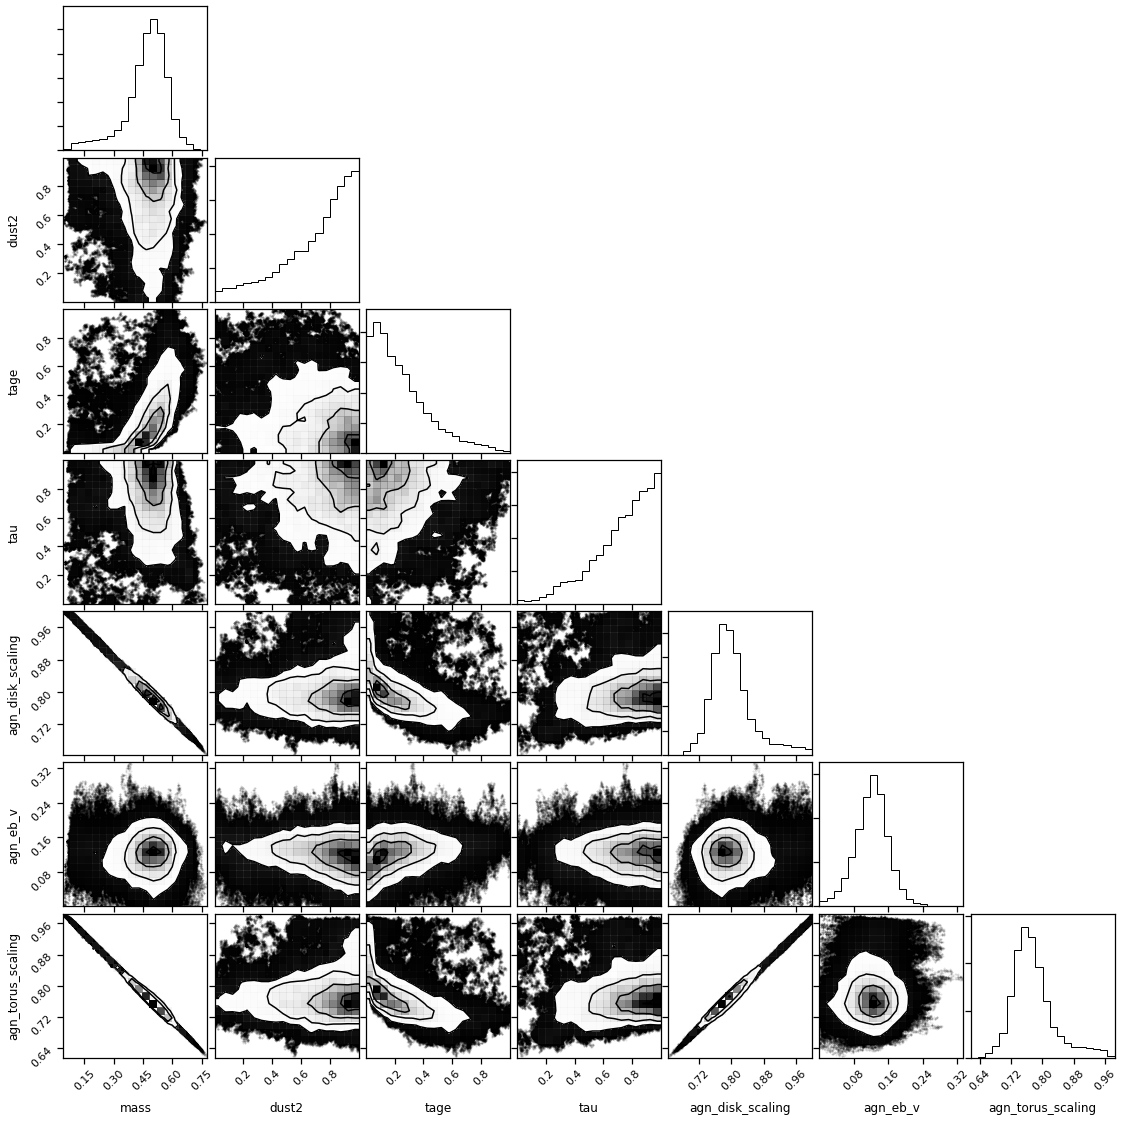

In [7]:
# is it better, or just not spread enough? Compare with running for 16k
galaxies = run_sampler.read_performance('results/emulated_sampling/latest_16000_96_roughly_correct')
_ = corner.corner(galaxies[0].reshape(-1, 7), labels=params)

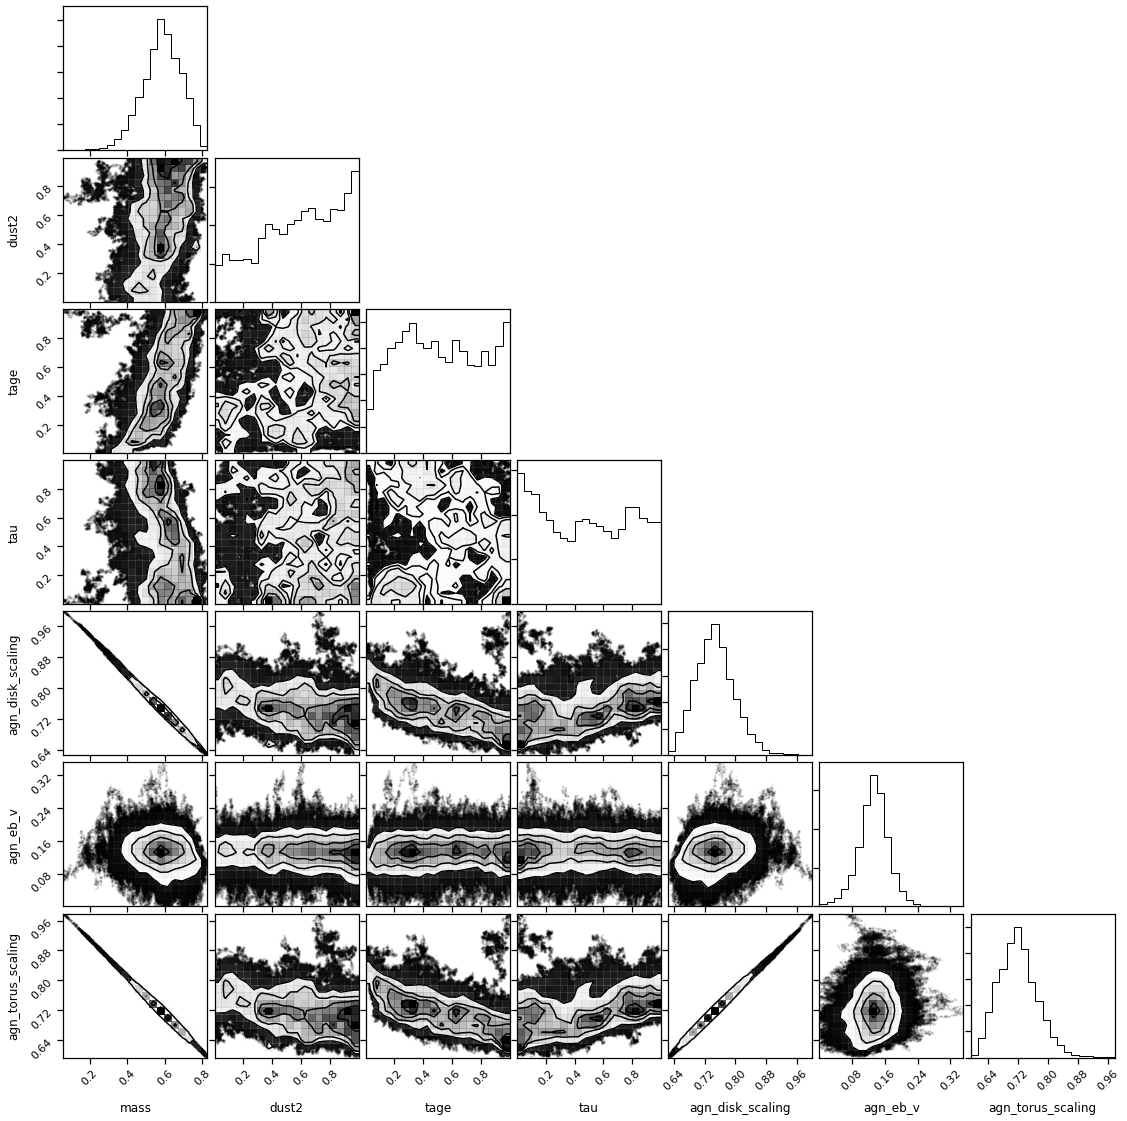

In [11]:
# starting from optimised (before testing)
galaxies = run_sampler.read_performance('results/emulated_sampling/latest_8000_96_optimised')
_ = corner.corner(galaxies[0].reshape(-1, 7), labels=params)

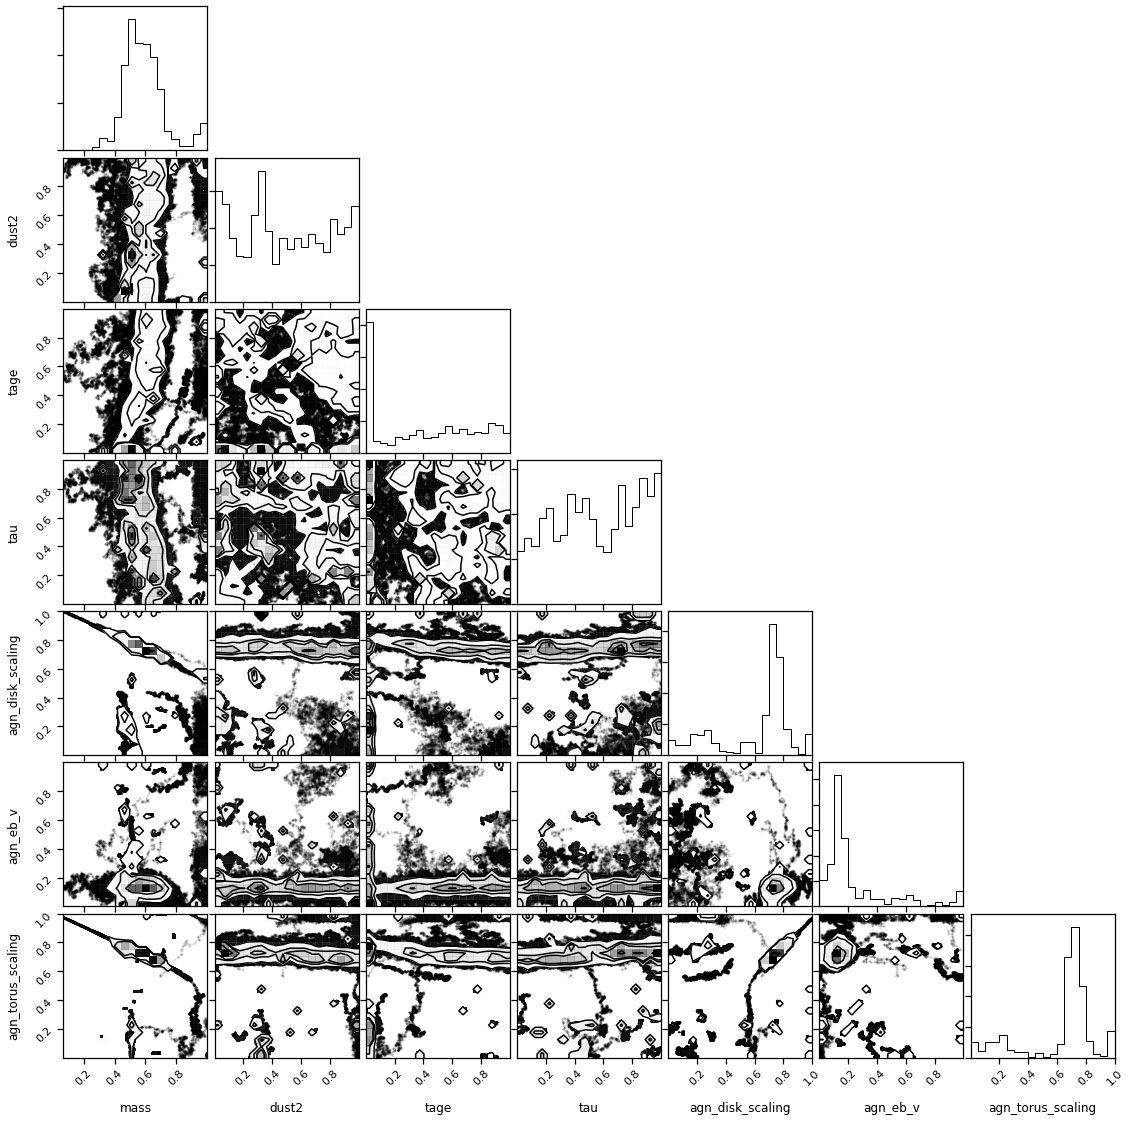

In [12]:
# starting from random
galaxies = run_sampler.read_performance('results/emulated_sampling/latest_8000_96_random')
_ = corner.corner(galaxies[0].reshape(-1, 7), labels=params)

Random doesn't find quite the same super-clean correlation between scale parameters, presumably because some initial points aren't on that relation and (perhaps due to per-chain step size) don't make there way onto said relation. I need a better way to init...

With just one chain and 150k samples, tau and tage seem essentially unconstrained. But with 96...

With random, it looks really ugly but is actually not bad at getting the right params - for this example, better than optimised start I would say. Tomorrow: let's dig in more and properly visualise the initial state funcs

NICE! All parameters bang on. Though admittedly it is still possible that the previously unconstrained params are only constrained because there hasn't yet been time to diffuse away from the correct starting point, especially as each chain only runs for 2k+8k steps vs 150k steps on the previous failed cornerplot.

This means that *if we can start from the right place, we can get the right answers*

TODO load up the example, and see why in the world the three scaling parameters are so perfectly correlated. But hey, if it works...perhaps this makes sense?

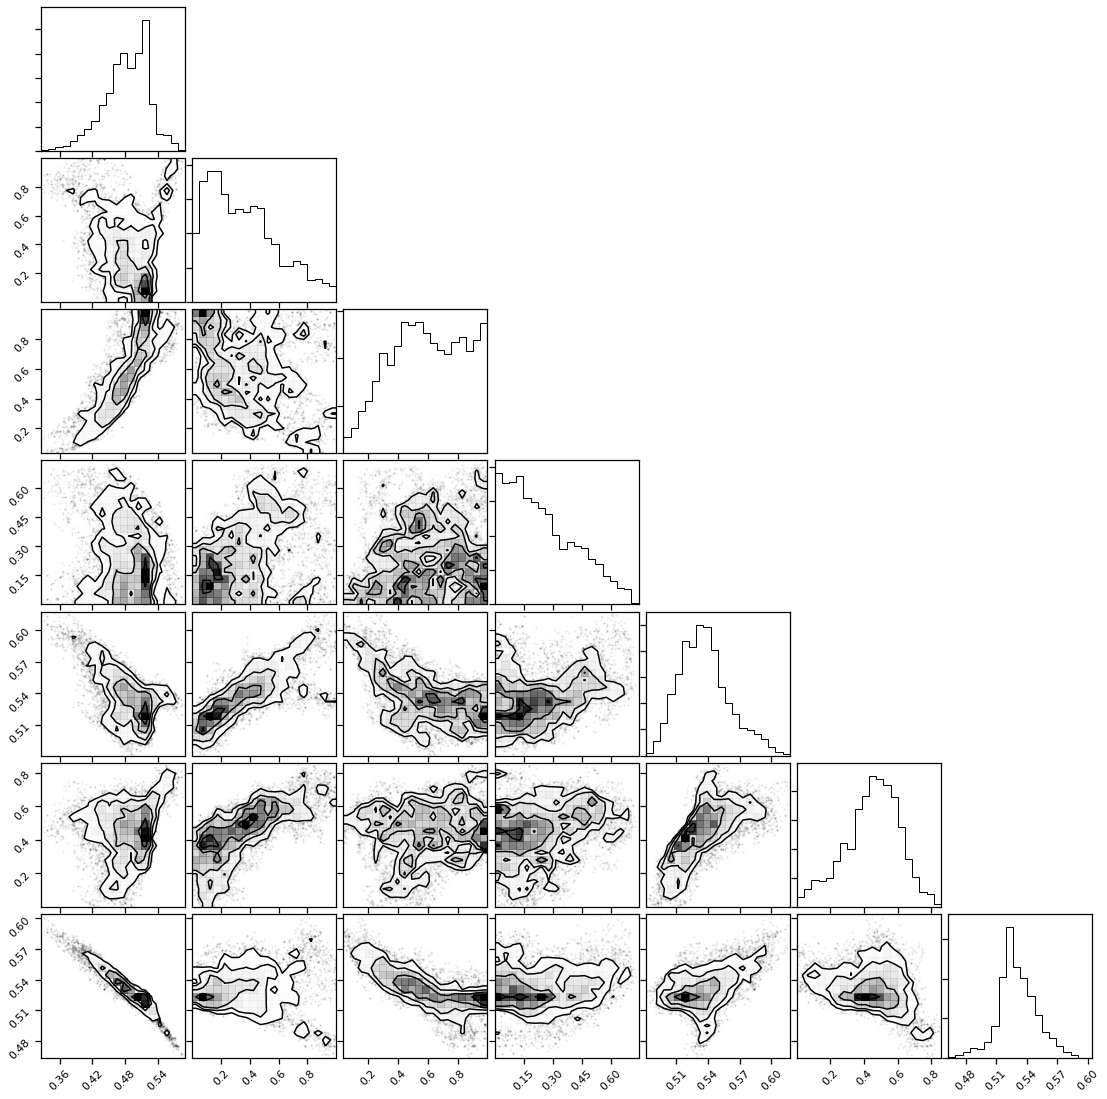

In [23]:
# using L, leapfrog steps, of either 1 or 3 I think
samples, true_params, true_observations = run_sampler.read_performance('results/emulated_sampling/latest_8000_1_roughly_correct')
_ = corner.corner(samples[0].reshape(-1, 7))

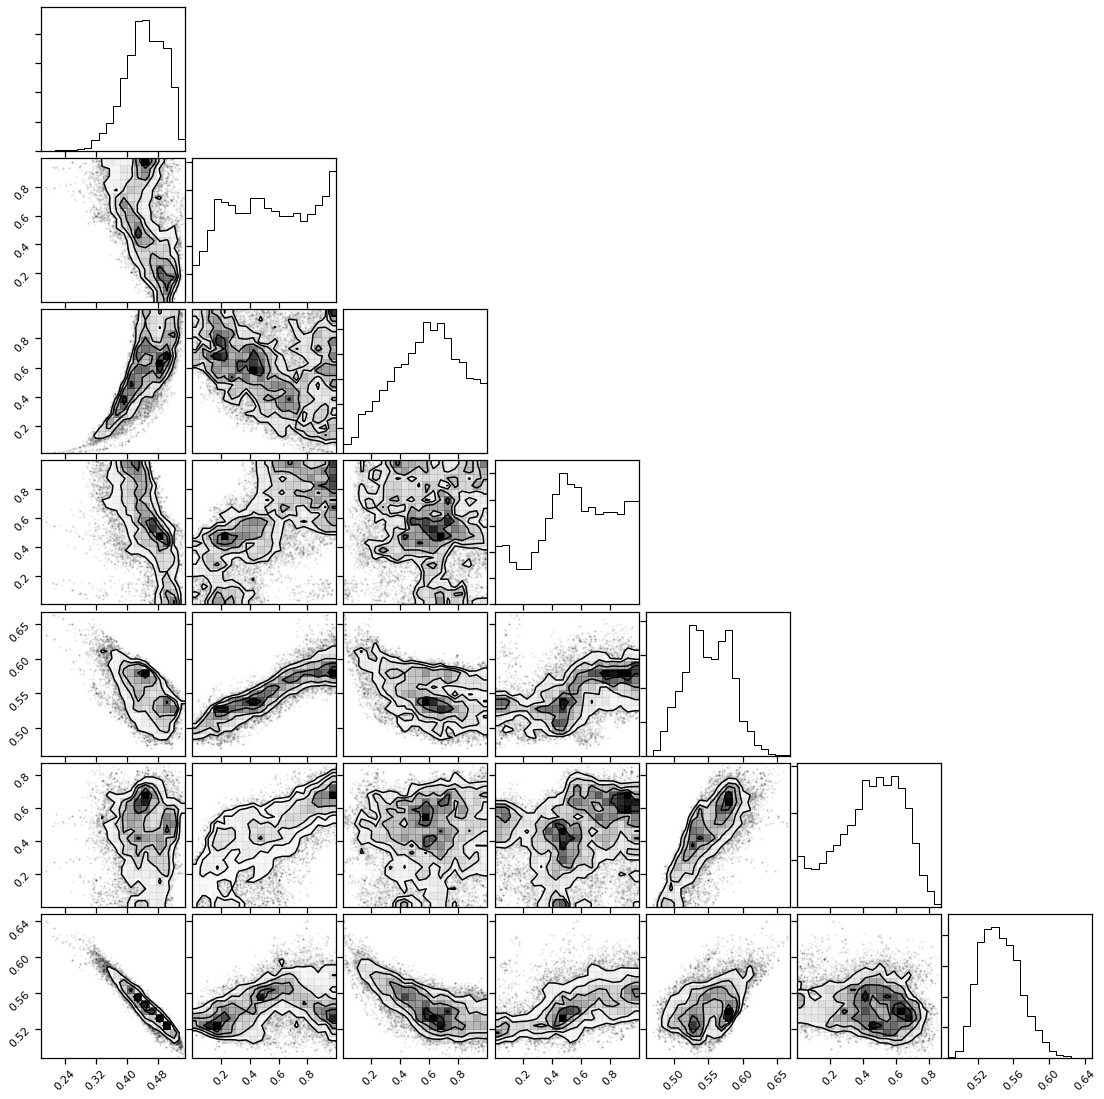

In [6]:
# using L, leapfrog steps, of either 1 or 3 I think
samples, true_params, true_observations = run_sampler.read_performance('results/emulated_sampling/latest_16000_1_roughly_correct')
_ = corner.corner(samples[0].reshape(-1, 7))

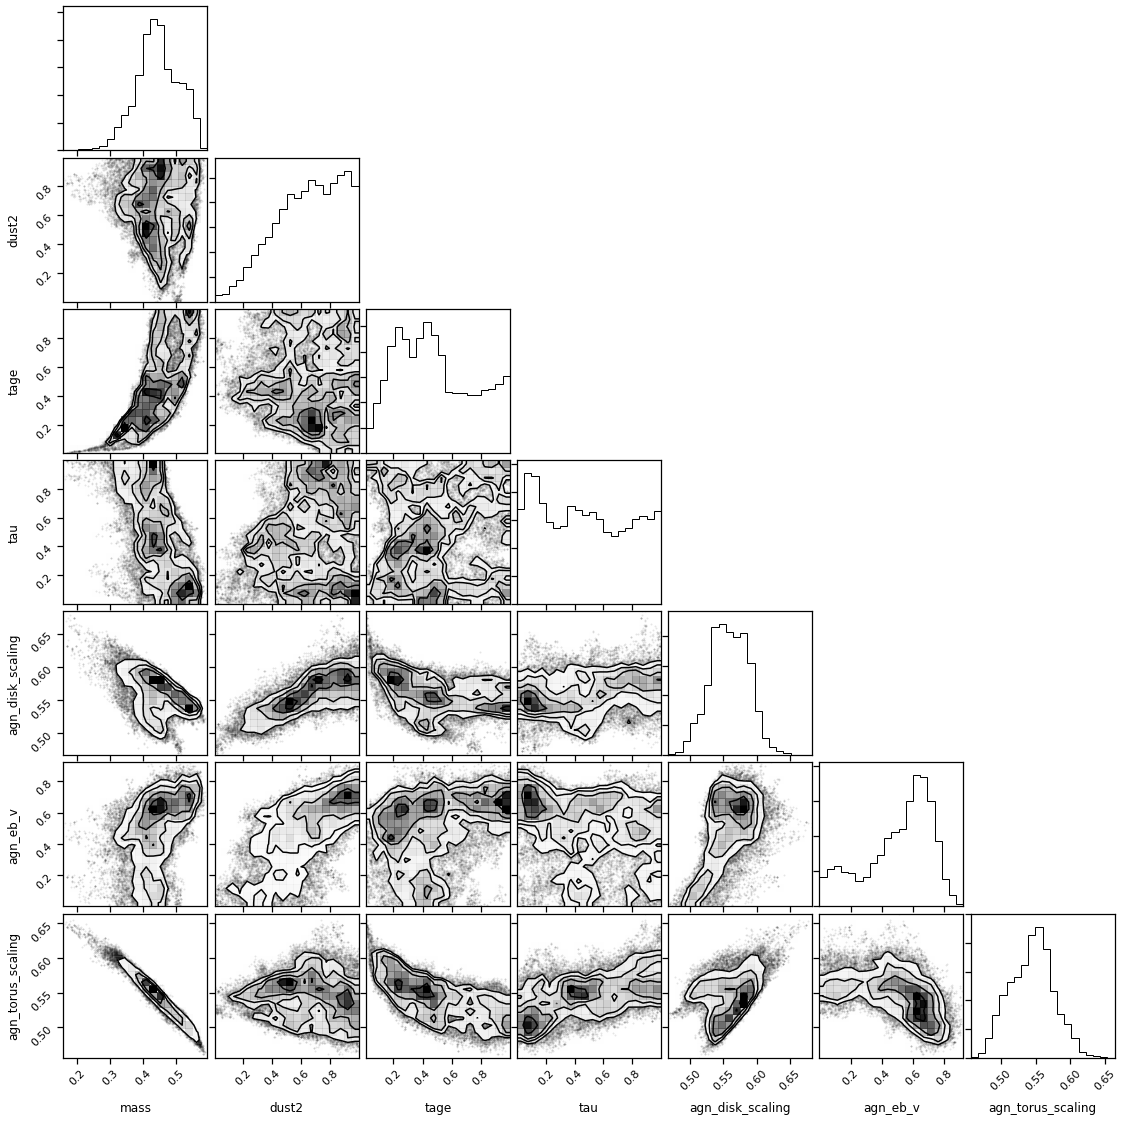

In [7]:
# using L, leapfrog steps, of either 1 or 3 I think
samples, true_params, true_observations = run_sampler.read_performance('results/emulated_sampling/latest_32000_1_roughly_correct')
_ = corner.corner(samples[0].reshape(-1, 7), labels=params)

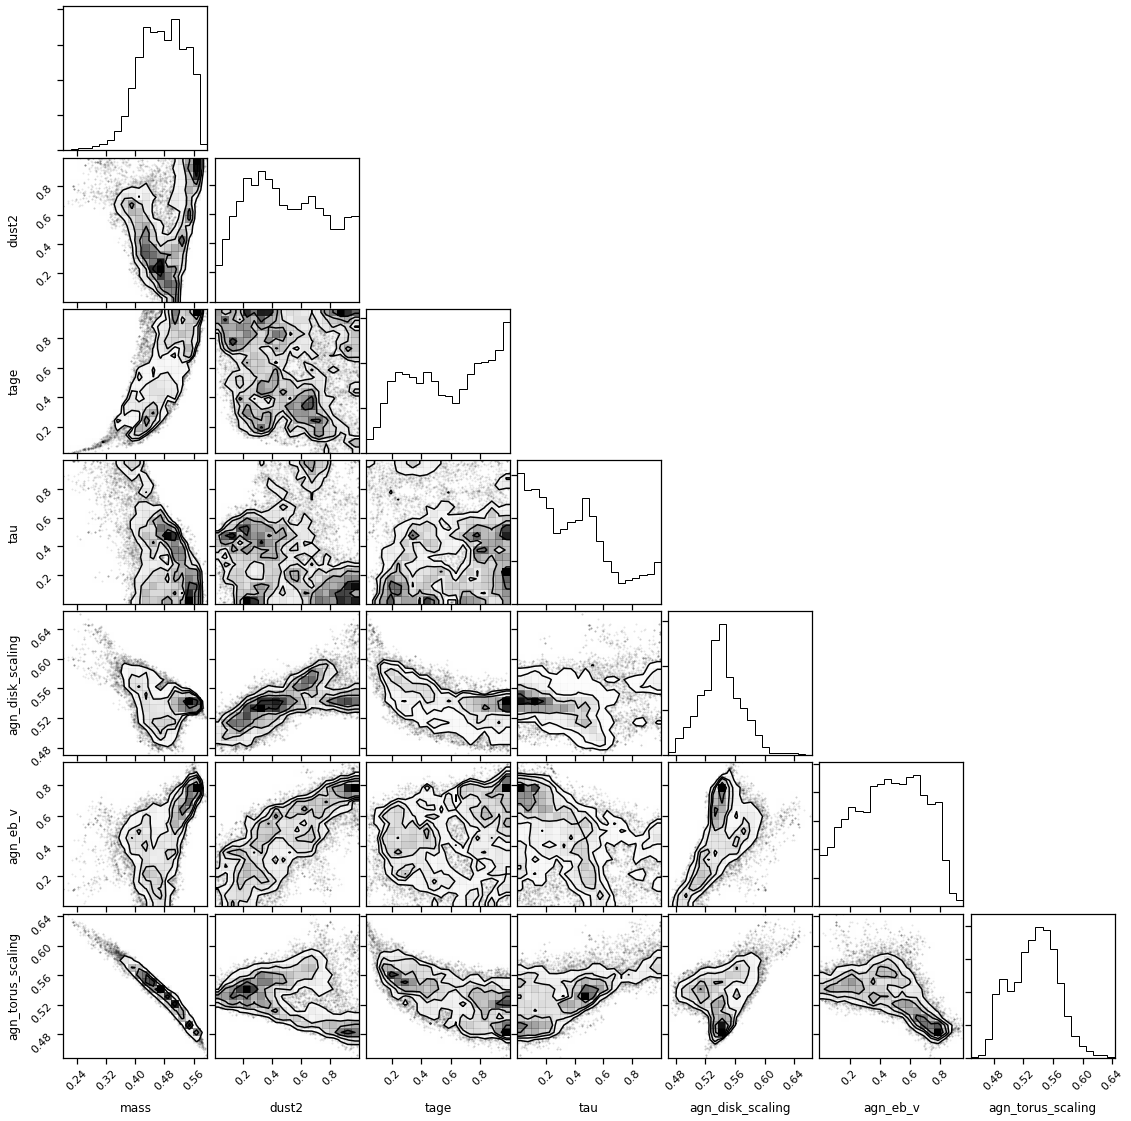

In [10]:
# using L, leapfrog steps, of either 1 or 3 I think
samples, true_params, true_observations = run_sampler.read_performance('results/emulated_sampling/latest_16000_1_optimised')
_ = corner.corner(samples[0].reshape(-1, 7), labels=params)

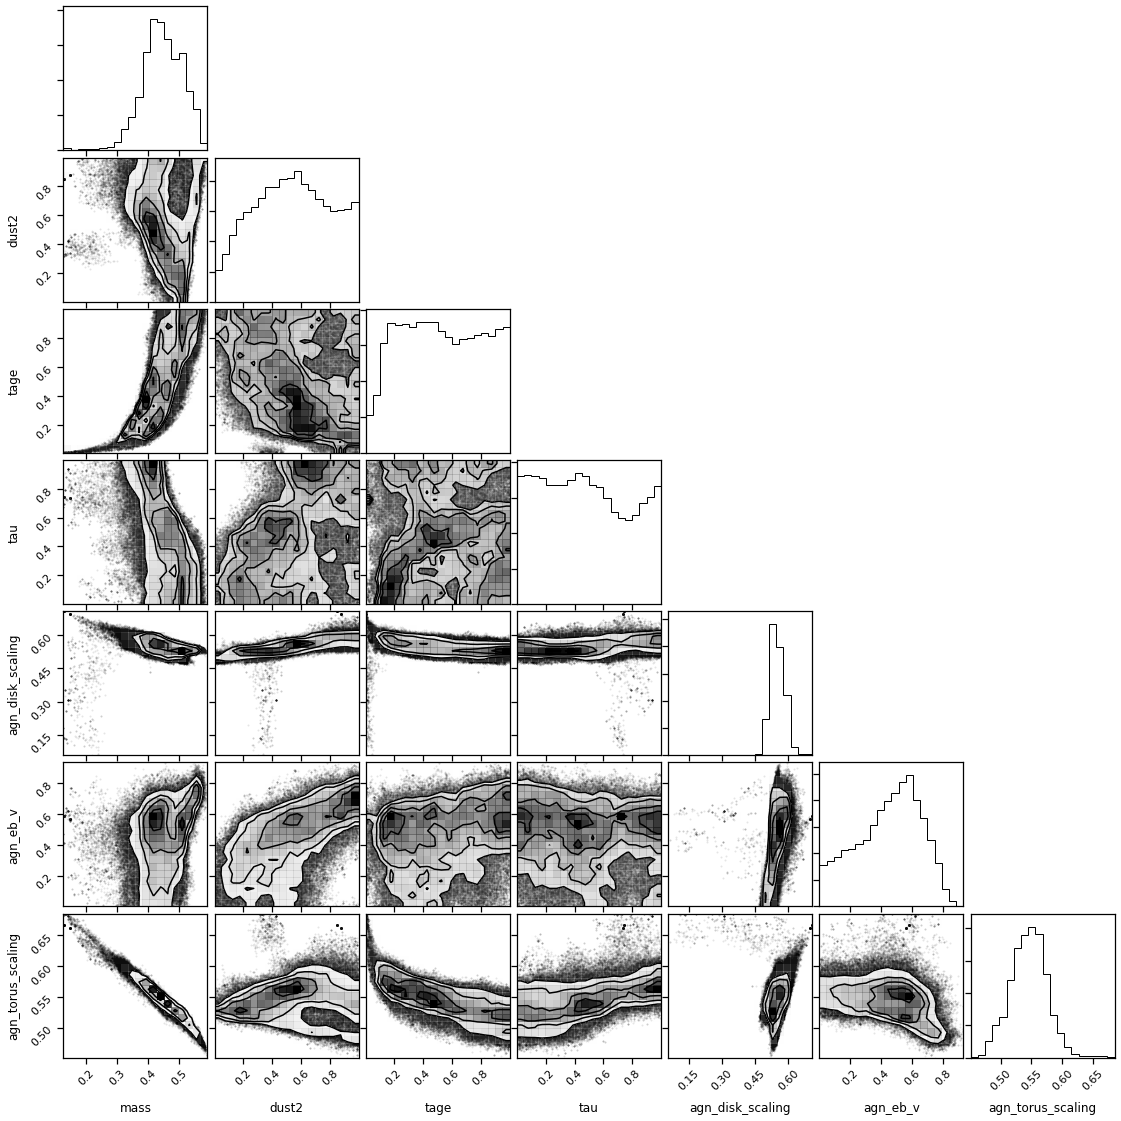

In [7]:
# using L, leapfrog steps, of either 1 or 3 I think
samples, true_params, true_observations = run_sampler.read_performance('results/emulated_sampling/latest_128000_1_optimised')
_ = corner.corner(samples[0].reshape(-1, 7), labels=params)

Next - go home and try a 1 hour run (16k,1->8mins, 60mins,1->120k), from optim. start

Message Chris re. meg, surfing?

If that works, tomorrow's job will be to rewrite everything in single-chain mode (branching at optim stage)

In [19]:
samples[1].mean(axis=0).mean(axis=0)

array([0.5816056 , 0.5920797 , 0.5177684 , 0.47688472, 0.74762607,
       0.1321442 , 0.71938807], dtype=float32)

In [20]:
samples[0].mean(axis=0).mean(axis=0)

array([0.45936123, 0.38013315, 0.59089357, 0.4011962 , 0.5336071 ,
       0.3607838 , 0.54146594], dtype=float32)